<a ><img src="https://cdn.tuinvest.de/assets/logos/TUInvest_Logo-353d42494757660b8381a31c9f99a6ca.png"  width="200" align="left"> </a>
<div style="text-align: right"> <h3><span style="color:gray"> INTERNAL USE ONLY </span> </h3> </div>

<br>
<br>
<br>

<a ><img src="Pictures/QSeries.png" Width="300" align="center"> </a>

<br>
<br>



<h1><center>AlgoTrading 101 — A hands-on Introduction</center></h1>
<h2><center> <span style="font-weight:normal"><font color='#022F73'> Lecture 3: Backtesting and Portfolio Strategy </font>  </span></center></h2>


<h3><center><font color='gray'>JONAS GOTTAL</font></center></h3>


<h4>About this Notebook</h4>
The Objective of this Lecture is a comprehensible hands-on Introduction to Algo Trading <br>
for the members of TU Invest, to raise curiosity and resurrect Alternative Strategies/Assets.

Although the material used is not fit to  *understand*  for beginners, with easier strategies <br>
there won't be a profitable among them. Thus the mathematics statistics behind the following  <br>
stratgies might be hard to understand but not to implement. And I hope this will lead some  <br>
curious minds to further study the concepts more thoroughly. <br>
<br>


---
---
<div style="text-align: center"> <h3><span style="color:red"> WORKING DRAFT</span> </h3> </div>

---
---


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="text-decoration:none; margin-top: 30px; background-color:#F2F2F2; border-color:#022F73">
    <span style="color:#022F73">
    <ol>
        <li><a href="#1"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Backtesting</span> </a></li>
       <ol>
       <li><a href="#16"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Biases: Look-Ahead, Survivorship and Optimization</span> </a></li>    
       <li><a href="#3"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Volume, Slippage, Liquidity and other Costs</span> </a></li>
        <li><a href="#4"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Libraries</span> </a></li>   
        </ol>
       <li><a href="#5"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Performance</span> </a></li>
       <ol>
       <li><a href="#6"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Basics: Alpha and Beta</span> </a></li>  
        <li><a href="#7"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Portfolio Overview: Returns, Risk and Drawdown</span> </a></li>   
       <li><a href="#8"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Beta Hedging</span> </a></li>          
        </ol>
        <li><a href="#9"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Portfolio Strategy</span> </a></li>
       <ol>
        <li><a href="#10"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Markowitz</span> </a></li>    
       <li><a href="#11"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Risk-Constrained Portfolio Optimization</span> </a></li>      
        </ol> 
        <li><a href="#12"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >APPENDIX</span> </a></li>
        <ol>
        <li><a href="#13"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Outlook for Part II: Derivatives, Big Data and Sentiment Analysis</span> </a></li>    
       <li><a href="#14"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Additional Sources</span> </a></li> 
        </ol>
    </ol>
    </span>
</div>

In [11]:
import numpy as np
import pandas as pd
import dtale
import math
import matplotlib.pyplot as plt
import seaborn as sns
import backtester
import statsmodels.api as sm
from scipy import stats
from statsmodels import regression

# 1. Backtesting <a id="1"></a>

### Basic Thought

Iteration through (unseen) historical Data to mimic the market

## A. Biases: Survivorship, Look-Ahead and Optimization <a id="16"></a>

### Survivorship Bias

<a ><img src="https://upload.wikimedia.org/wikipedia/commons/9/98/Survivorship-bias.png" Width="700" align="center"> </a>




In order to evaluate a population based on sample observations, the sample must be unbiased. Otherwise, it is not representative of the population, and conclusions drawn from it will be invalid. For example, we always take into account the number of samples we have, and expect to have more accurate results if we have more observations. Here we will discuss four other types of sampling bias.

### Look-ahead bias


Look-ahead bias occurs when attempting to analyze from the perspective of a day in the past and using information that was not available on that day. For instance, fundamentals data may not be reported in real time. Models subject to look-ahead bias cannot be used in practice since they would require information from the future.

### Optimization Bias

#### What is overfitting?

When constructing a model, we tune both the parameters and the model by fitting to sample data. We then use the model and parameters to predict data we have not yet observed. We say a model is overfit when it is overly sensitive to noise and idiosyncracies in the sample data, and therefore does not reflect the underlying data-generating process.

To understand why this happens, one has to consider the amount of noise present in any dataset. One can consider a set of data as $D_{T}$, the true underlying data that came from whatever process we are trying to model, and $\epsilon$, some random noise. Therefore, what we actually see is $D = D_{T} + \epsilon$. By building a complicated model we might fit our model to very perfectly predict for the given $\epsilon$. However, when we test on future out of sample data, this model will fail to predict for $D_{T}$.

In practice, we only care about fitting to the sample insofar as that gives an accurate fit to future data. The two broad causes of overfitting are:
* small sample size, so that noise and trend are not distinguishable
* choosing an overly complex model, so that it ends up contorting to fit the noise in the sample

Generalizing this to stocks, if your model starts developing many specific rules based on specific past events, it is almost definitely overfitting. This is why black-box machine learning (neural networks, etc.) is so dangerous when not done correctly.

#### Verbal Example: Too Many Rules (Complexity)

Let's say you have the following dataset:

| TV Channel | Room Lighting Intensity | Enjoyment |
|------------|-------------------------|-----------|
| 1          | 2                       | 1         |
| 2          | 3                       | 2         |
| 3          | 1                       | 3         |

You are trying to predict enjoyment, so you create the following rules:

1. If TV Channel is 1 and Lighting Intensity is 2, then Enjoyment will be 1.
2. If TV Channel is 2 and Lighting Intensity is 3, then Enjoyment will be 2.
3. If TV Channel is 3 and Lighting Intensity is 1, then Enjoyment will be 3.
4. In all other cases predict an average enjoyment of 2.

This is a well defined model for future data, however, in this case let's say your enjoyment is purely dependent on the tv channel and not on the lighting. Because we have a rule for each row in our dataset, our model is perfectly predictive in our historical data, but would performly poorly in real trials because  we are overfitting to random noise in the lighting intensity data.

Generalizing this to stocks, if your model starts developing many specific rules based on specific past events, it is almost definitely overfitting. This is why black-box machine learning (neural networks, etc.) is so dangerous when not done correctly.

#### Example: Curve fitting

Overfitting is most easily seen when we look at polynomial regression. Below we construct a dataset which noisily follows a quadratic. The linear model is underfit: simple linear models aren't suitable for all situations, especially when we have reason to believe that the data is nonlinear. The quadratic curve has some error but fits the data well.

When we fit a ninth-degree polynomial to the data, the error is zero - a ninth-degree polynomial can be constructed to go through any 10 points - but, looking at the tails of the curve, we know that we can't expect it to accurately predict other samples from the same distribution. It fits the data perfectly, but that is because it also fits the noise perfectly, and the noise is not what we want to model. In this case we have selected a model that is too complex.

In [6]:
from statsmodels import regression
from scipy import poly1d

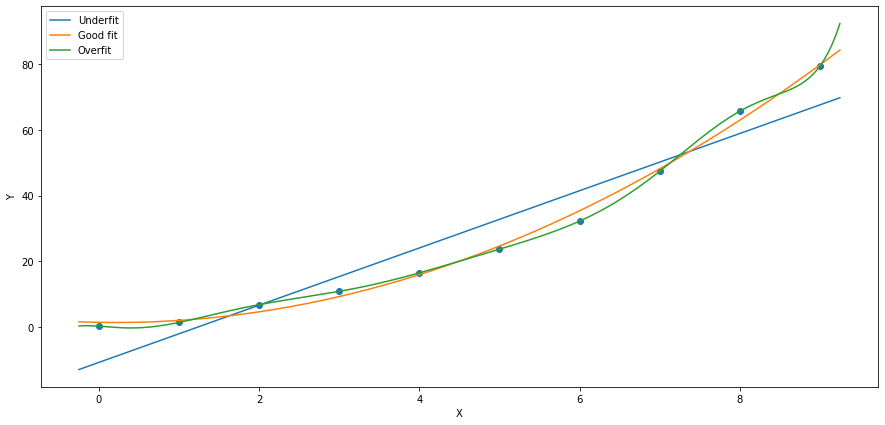

In [7]:
x = np.arange(10)
y = 2*np.random.randn(10) + x**2
xs = np.linspace(-0.25, 9.25, 200)

lin = np.polyfit(x, y, 1)
quad = np.polyfit(x, y, 2)
many = np.polyfit(x, y, 9)

plt.figure(figsize=(15,7))
plt.scatter(x, y)
plt.plot(xs, poly1d(lin)(xs))
plt.plot(xs, poly1d(quad)(xs))
plt.plot(xs, poly1d(many)(xs))
plt.ylabel('Y')
plt.xlabel('X')
plt.legend(['Underfit', 'Good fit', 'Overfit']);
plt.show()

When working with real data, there is unlikely to ever be a situation where a ninth-degree polynomial is appropriate: our choice of function should reflect a belief about the underlying process, and real-world processes generally do not follow high-degree polynomial curves. This example is contrived, but it can be tempting to use a quadratic or cubic model just to decrease sample error.

#### Note: Model/Parameter Parsimony

Just as the most elegant physics models describe a tremendous amount of our world through a few equations, a good trading model should explain most of the data through a few rules. Any time you start to have a number of rules even close to the number of points in your data set, you can be sure you are overfitting. Since parameters can be thought of as rules as they equivalently constrain a model, the same is true of parameters. Fewer parameters is better, and it is better to explain 60% of the data with 2-3 paremeters than 90% with 10.

#### Beware of the perfect fit

Because there is almost always noise present in real data, a perfect fit is almost always indicative of overfitting. It is almost impossible to know the percentage noise/signal in a given data set while you are developing the model, but use your common sense. Are the predictions surprisingly good? Then you're probably overfitting.

#### Example: Regression parameters

How do we know which variables to include in a model? If we're afraid of omitting something important, we might try different ones and include all the variables we can find that improve the fit. Below we regress one asset that is in the same sector as the asset whose price we're trying to predict, and three other unrelated ones. In our initial timeframe, we are able to fit the model more closely to the data when using multiple variables than when using just one.

However, when we use the same estimated parameters to model a different time period, we find that the single-variable model fits worse, while the multiple-variable model is entirely useless. It seems that the relationships we found are not consistent and are particular to the original sample period.

If we wanted, we could scan our universe for variables that were correlated with the dependent variable, and construct an extremely overfitted model. However, in most cases the correlation will be spurious, and the relationship will not continue into the future.

#### Example: Rolling windows

One of the challenges in building a model that uses rolling parameter estimates, such as rolling mean or rolling beta, is choosing a window length. A longer window will take into account long-term trends and be less volatile, but it will also lag more when taking into account new observations. The choice of window length strongly affects the rolling parameter estimate and can change how we see and treat the data. Below we calculate the rolling averages of a stock price for different window lengths:

Processing data for stock: AAPL
20% done...
40% done...
60% done...
80% done...


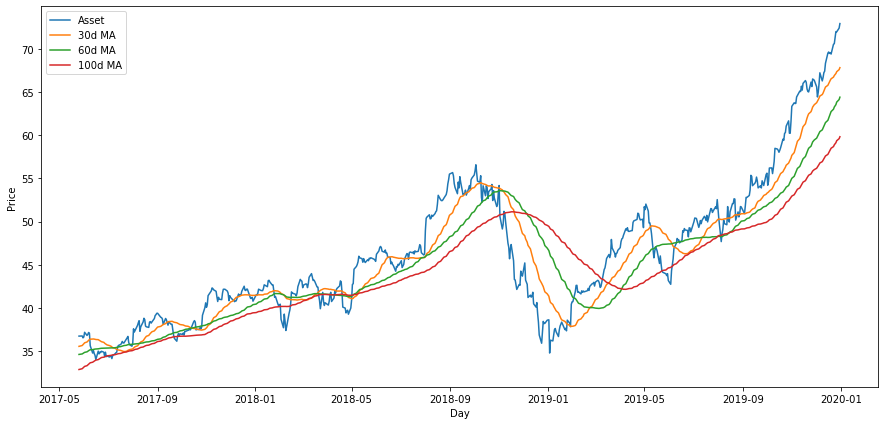

In [16]:
from backtester.dataSource.yahoo_data_source import YahooStockDataSource


startDateStr = '2017/01/01'
endDateStr = '2020/01/01'
cachedFolderName = '../data/'
dataSetId = 'Data'
instrumentIds = ['AAPL']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
X = ds.getBookDataByFeature()['adjClose']
asset = X.iloc[:, 0]
# Compute rolling averages for various window lengths
mu_30d = asset.rolling(window=30, center=False).mean()
mu_60d = asset.rolling(window=60, center=False).mean()
mu_100d = asset.rolling(window=100, center=False).mean()

# Plot asset pricing data with rolling means from the 100th day, when all the means become available
plt.figure(figsize=(15,7))
plt.plot(asset[100:], label='Asset')
plt.plot(mu_30d[100:], label='30d MA')
plt.plot(mu_60d[100:], label='60d MA')
plt.plot(mu_100d[100:], label='100d MA')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Avoiding overfitting

We can try to avoid overfitting by taking large samples, choosing reasonable and simple models, and not cherry-picking parameters to fit the data; but just running two backtests is already overfitting.

##### Out of Sample Testing

To make sure we haven't broken our model with overfitting, we have to test out of sample. That is, we need to gather data that we did not use in constructing the model, and test whether our model continues to work. If we cannot gather large amounts of additional data at will, we should split the sample we have into two parts, of which one is reserved for testing only.

##### Common Mistake: Abusing Out of Sample Data

Sometimes people will construct a model on in-sample data, test on out-of-sample data, and conclude it doesn't work. They will then repeat this process until they find a model that works. This is still overfitting, as you have overfit the model to the out-of-sample data by using it many times, and when you actually test on true out-of-sample data your model will likely break down.

##### Cross Validation

Cross validation is the process of splitting your data into n parts, then estimating optimal parameters for n-1 parts combined and testing on the final part. By doing this n times, one for each part held out, we can establish how stable our parameter estimates are and how predictive they are on data not from the original set.

#### Information Criterion

Information criterion are a rigorous statistical way to test if the amount of complexity in your model is worth the extra predictive power. The test favors simpler models and will tell you if you are introducing a large amount of complexity without much return. One of the most common methods is [Akaike Information Criterion.](https://en.wikipedia.org/wiki/Akaike_information_criterion)

### Others

#### Data-mining bias

Data mining refers to testing a set of data for the presense of different patterns, and can lead to bias if used excessively. Because our analyses are always probabilistic, we can always try enough things that one will appear to work. For instance, if we test 100 different variables for correlation with a dataset using a 5% significance level, we expect to find 5 that are significantly correlated with the data just by random chance. Below we test this for random variables and a random dataset. The result will be different each time, so try rerunning the cell!

In [3]:
import numpy as np
from scipy.stats import pearsonr

# Generate completely random numbers
randos = [np.random.rand(100) for i in range(100)]
y = np.random.rand(100)

# Compute correlation coefficients (Pearson r) and record their p-values (2nd value returned by pearsonr)
ps = [pearsonr(x,y)[1] for x in randos]

# Print the p-values of the significant correlations, i.e. those that are less than .05
print ([p for p in ps if p < .05])

[0.037895617712912014, 0.048792936317678275, 0.02167880657951087, 0.02541630628102966, 0.03462656793672533]


Above we data-mined by hand. There is also intergeneratinal data mining, which is using previous results about the same dataset you are investigating or a highly related one, which can also lead to bias.

The problem here is that there is no reason to believe that the pattern we found will continue; for instance, if we continue to generate random numbers above, they will not continue to be correlated. [Meaningless correlations](http://tylervigen.com/view_correlation?id=866) can arise between datasets by coincidence. This is similar to the problem of overfitting, where a model is contorted to fit historical data perfectly but then fails out of sample. It is important to perform such an out-of-sample test (that is, using data not overlapping with that which was examined when creating the model) in order to check for data-mining bias.

#### Sample selection bias

Bias resulting from data availability is called sample selection bias. Sometimes it is impossible to avoid, but awareness of the phenomenon can help avoid incorrect conclusions. Survivorship bias occurs when securities dropped from databases are not taken into account. This causes a bias because future analyses then do not take into account, for example, stocks of businesses that went bankrupt. However, businesses whose stock you buy now may very well go bankrupt in the future, so it is important to incorporate the behavior of such stocks into your model.

#### Time-period bias

The choice of sample period affects results, and a model or analysis may not generalize to future periods. This is known as time-period bias. If we use only a short time period, we risk putting a lot of weight on a local phenomenon. However, if we use a long time period, we may include data from a prior regime that is no longer relevant.

--- 
---

## B. Volume, Slippage, Liquidity and other Costs <a id="3"></a>

### Volume


Volume is how much trading occurs for a given instrument, or set of instruments, over a given time period. 

#### Example Volume Computation
For instance, consider a hypothetical equity asset $A$. If, over the course of a minute, 100,000 shares of $A$ are bought, then the shares traded volume of $A$ is 100,000. To find the dollar volume traded for $A$, which is the more often-used statistic, we need to take a weighted average of all the different prices $A$ traded for over the minute times the number of shares that traded at each price. This is equivalent to adding up the dollar volumes of all the individual trasnactions that occured. For instance, let's say in this case there were there separate transactions. One for 30,000 shares, one for 60,000 shares, and one for 10,000 shares. The prices were 30 USD, 31 USD, and 33 USD, respectively. Let's model this out.

In [22]:
num_shares = np.asarray([30000, 60000, 10000])
prices = np.asarray([30, 31, 33])

np.dot(num_shares, prices)

3090000

So total dollar volume is 3.09 million USD. Notice that this is equivalent to taking the dollar volume averaged price and multiplying by the number of shares traded over that bar.

In [24]:
# Get the average trade price
print ("Average trade price: %s" % (np.mean(prices)))

# Get the volume weighted average
vw = np.dot(num_shares, prices) / float(np.sum(num_shares))
print ("Volume weighted average trade price: %s" % (vw))

# Go back to volume
v = vw * np.sum(num_shares)
print ("Volume: %s" % (v))

Average trade price: 31.333333333333332
Volume weighted average trade price: 30.9
Volume: 3090000.0


Often in real datasets you will be given averaged or 'last traded' data rather than individual trades. With averaged data, some average is taken over a bar (time period). With last traded data, only the final observation from that bar is reported. It is important to know if the data is averaged, volume averaged, or simply last traded. All of these will need to be treated differently.

For pricing data, Quantopian currently (as of April 2017) provides the last traded prices at a minute resolution. The volume is the sum of all volume in that bar. While we do not offer minutely volume-weighted price, daily volume-weighted price can be approximated from the minute bars.


#### High Equity Volume After Market Open
There tends to be high volume right after market open. This is due to a variety of factors including people wanting to update their positions based on price changes and new information that emerged before trading started. Since there was a ton of time and possibly news overnight while the market could not react, trading right after the open can be a bit volatile as pricing adjusts.

#### High Equity Volume Before Market Close
There is a similar effect at the end of the day when people want to get in their final orders before trading closes and they no longer have the chance. Again there are a variety of factors that drive this increase, but the effect tends to be consistent.

#### Modeling Volume
Volume can change a lot, and summary statistics such as mean volume may not always be representative. Model it as you would any other quantity and pay attention to whether your volume forecasts or measurements are useful. We do not discuss any specific models in this lecture as the models are often specific to the markets and instruments being traded.

As with any other model, a model of volume needs to be carefully validated using rigorous statistics. As a rule of thumb you can expect more volume at the start and end of day in the US Equity market, but this will vary by equity and day, plus there will be shocks and half days. In practice you should apply just as much care as you would trying to model returns.  

### Slippage

#### What is Slippage?

Slippage occurs when large buy or sell orders drive the price of the market up or down respectively. Remember that for every share bought, a share must be sold by another party. If no parties are selling shares, buy orders will not be filled. This is a simplification of what actually occurs as there are complexities around issues such as bid/ask spread, but we will not consider those here. To understand why price shifts happen when large orders are placed, consider the following scenario:

1. Person A places a buy order for 1000 shares of stock X. Currently trading at $100$ USD / share.
2. There is only one sell order for 500 shares.
3. The broker fills 500 shares of the order at 100 USD / share.
3. There are 500 shares remaining to fill. Other market participants notice that there is demand at $100$ USD / share, so they increase their sell price to 101 USD / share.
4. Another sell order gets placed for 500 shares at 101 USD / share.
5. The broker fills the remaining 500 shares of the original order at 101 USD / share. Closing out the process.

As you can see, the large order for stock X was not immediately filled, and the demand pushed the market price against the original order, resulting in a fill price worse than expected. The opposite occurs for sell orders. In general, the larger the order, the more slippage will be experienced by a trade.

#### Complications with Forecasting Slippage

Modeling slippage is not trivial and is the subject of research by professional quantitative teams. There are different parameters and the behavior of slippage varies across markets and instruments. Things like the bid/ask spread will influence it. 

#### Why is this Important to Quantitative Strategies?

Quantitative strategies often rely on finding small but consistent edges across many instruments in a market or multiple markets. If the amount of profit you expect to make off of each trade is very small, slippage can eat a significant amount of that profit. Quantitative strategies rely on executing orders as they have been defined, so anything that counteracts the orders can break the strategy.

#### Where is Slippage Worst?

Slippage is often worst on stocks with very little volume. Some egregious offenders are small and micro cap stocks. They are very low volume and develop large inefficiencies, but when you try to trade the inefficiencies you are unable to due to the lack of trades on the other side of the market. If you wait long enough you may be able to fill your order, but in that time you will suffer a lot of slippage.

### Liquidity

#### What is Liquidity?
Before we can define liquidity, we need to define a few key execution parameters. This is certainly not an exhaustive list of parameters that can decribe execution conditions, but they are the key ones for our purposes here.

#### Execution Parameters
* Trade Size $s$
* Market Price $p_m$
* Time to Fill $t$
* Realized Fill Price $p_f$

#### Defining Liquidity in Terms of Execution Feasibility
Liquidity is a somewhat ambiguous term. There are different ways of defining it and therefore different ways of measuring it. In general it's the ability to execute large trades quickly without experiencing slippage. Another way to think about it is how easy it is to convert a held asset to cash quickly. Rather than having one precise definition, people often descibe liquidity according to their trading needs. For instance, if one regularly needs to execute trades of size $s$=100,000USD, and market $M_1$ can regularly support that with fills coming within $t$=1s and slippage or $p_f / p_m$ < 1.0001 (0.01% error), then we'd say that market $M$ is sufficiently liquid for one's purposes. On the other hand if another market $M_2$ can support trades of larger size, fill them in shorter time, or has consistently less slippage, then we would say that $M_2$ is *more* liquid.

The takeaway is that liquidity depends on what you are trying to trade and how, and once you've established a benchmark you can compare it to other potential instruments, markets, brokers, or trading methods.

#### Liquidity vs. Volume
Liquidity and volume are not the same thing. Liquidity is the important property that affects how easily we can trade. Volume is a related but indirect proxy for liquidity. In general people use volume as one of the main ways to determine how liquid a trading environemnt will be. If there is high volume, it's likely you'll be able to execute a trade quickly and with minimal slippage. If you're a high percentage of the volume, then you're in trouble. In general the higher the volume, the lower your percentage and the better things will be.

Although volume is central to liquidity, one can have cases of high volume with low liquidity.

##### One-Sided Market
A market may have high volume, but with a lot of demand in one direction. This can occur during a panic event in which case many people want to sell. This can result in large bid-ask spreads and, while trades may be closing, they will be closing at prices far away from what you would like (AKA high slippage). The high slippage indicates that this is an illiquid market. It is also more difficult to determine a fair market price when spreads and volatility are high. Momentum strategies can have higher slippage due to the fact that you're jumping into the same side of the market as everybody else.

##### Non-Continuous Prices
Sometimes there can be large block transactions occuring in a single instrument. Imagine that a large shareholder is trying to get rid of their stake in a company. Rather than selling it on the open market and exposing themselves to a massive amount of slippage, they trade it through other routes. There will still be a large amount of trading volume, but because it's not accessible to you, any trades you place will be exposed to the same illiquid conditions as without that volume.

#### Why is liquidity important?
Why do we actually care about modeling, forecasting, and understanding liquidity?

##### It's a bottleneck to trading any strategy.
The final step of implementing any trading strategy is actually trading it. If you have statistically verified a mathematical model and it's pumping out target positions, that's not useful unless you can turn those positions into reality by trading in the market. Liquidity essentially defines your ability to move from current positions to desired future positions. With low liquidity you will not be able to execute on desired trades and there will be large infidelities between your model's requests and your real positions.

##### There's no perfect case.
You cannot completely eliminate liquidity concerns. Each instrument will have variable liquidity and there may be exogenous system shocks. As with any other quantity you can just model it and then try to trade instruments for which you expect good liquidity. Every strategy will have some liquidity drag during actual trading, but you can just try to make it as small as possible by avoiding instruments with high liquidity risk.

##### Capital Base vs. Liquidity
The more capital you trade, the harder it is to fill trades without experiencing slippage, so the more expensive your trading will be. In general all strategies have capital ranges in which they are profitable. The upper limit is defined by liquidity constraints. Once you become too large a part of the market the slippage will eat all your returns. The lower end is defined by broker comissions and position errors. If you're attempting to trade a small amount of capital, flat trading costs from your broker may exceed returns. Likewise, if you are trading 100,000USD and place 1% of your portfolio into a single stock, you will not be able to buy precisely 100USD worth of the stock. The lack of fractional shares will result in large portfolio infidelities from your desired positions. Because trading few instruments results in position concentration risk, trading small amounts of capital is often difficult.

#### Backtesting and Liquidity
The purpose of backtesting is not to determine whether a model has predictive power. That should all be done at the statistical analysis stage and is inefficient to do in a backtester, not to mention the overfitting risk.

The purpose of backtesting is to check how robust a strategy is to real market frictions like illiquidity, slippage, and the resulting transaction costs. You can have highly predictive models that are simply not tradeable because the underlying instruments are not liquid enough.

##### Backtest Under a Range of Liquidity Assumptions
It pays to backtest under a few different liquidity assumptions. This tells you whether your strategy is robust, or whether it will fall apart the moment you change liquidity conditions at all.

#### Liquidity Varies by Market, Instrument, and Broker
In general different instruments will experience broadly different liquidity conditions.

#### Broad Liquidity Considerations in Equities
* Liquidity will vary by market cap. Higher cap stocks experience more absolute trading volume and are more liquid. Micro-cap stocks are 
* Some stocks are hard to borrow/short, and may experience one sided liquidity. Longs are easy to purchase, but shorts are hard to obtain. Quantopian does not currently provide hard to borrow data.

#### Liquidity in Futures
* Futures have much higher liquidity per instrument compared to equities.
* Liquidity varies by type/class of future. Certain types of futures will be far less illiquid. We'll show an example here.
* Liquidity has structure depending on expiration date. The volume of trading of a future contract will increase over time up to the expiration date. Far in advance there will be little volume as most people will be trading more current contracts. This volume effect must be considered when trying to trade futures. We'll show an example of this here.

### Transaction Costs


Whenever a trade is placed, you will pay a fee to the broker to trade. This fee can be based on trade size or just be flat, but is well defined and not an uncertain quantity. You will also experience slippage, which can be thought of as just another cost. Often both broker fees and slippage costs will be grouped under the term 'Transaction Costs', which describes generally how much it will cost to trade a specific strategy. If transaction costs eat too much of your profits a strategy might become infeasible.

### Transaction Costs Vary by Broker and Market
Because transaction costs vary based on trading environments, strategies that are inviable on a retail brokerage may be viable on an institutional prime brokerage with lower costs. Often quant strategies will fail on retail fees, but be fine for an institution. Just because you can't trade a strategy doesn't mean it's not valuable. You may be able to sell it to an organization that can trade it. When evaluating strategies for allocation Quantopian assumes trading conditions of a prime brokerage.

### Market Impact 

non of us have enough money for this
but if you have, here you [go!](https://github.com/quantopian/research_public/blob/master/notebooks/lectures/Market_Impact_Model/notebook.ipynb)

## C. Libraries <a id="4"></a>

### Examples in Python

- [FinmarketPY](https://github.com/cuemacro/finmarketpy)
- [Backtesting.py](https://kernc.github.io/backtesting.py/)
- [Backtester](https://pmorissette.github.io/bt/#)
- [Backtrader](https://www.backtrader.com/docu/)
- [Aquan](https://www.auquan.com/)

### Examples of Providers

- [Alpaca](https://alpaca.markets/)
- TBD

--- 
---

# 2. Performance <a id="5"></a>

## A. Alpha and Beta <a id="6"></a>

### How to compute $\alpha$ and $\beta$ for a given asset



A fundamental concept in portfolio management and risk allocation is computing the $\beta$ of an asset. $\beta$ is a measurement of the covariance of the asset with the market in general, and is expressed in this model.

$$r_a \approx \alpha + \beta r_b$$

$r_a$ are the returns of the asset, and $r_b$ are the returns of the benchmark, usually a proxy for the market like the S&P 500.

$\beta$ can be defined as

$$\beta = \frac{Cov(r_a, r_b)}{Var(r_b)}$$

To actually compute $\beta$, we can use linear regression. We find the OLS best fit line for all points $(r_{a, t}, r_{b, t})$, where $r_{a, t}$ is the asset's returns for time $t$, and $r_{b, t}$ the same for the benchmark. The slope of this line is $\beta$, and the y-intercept is $\alpha$.

We'll start by getting data for a specific time range.

Processing data for stock: TSLA
20% done...
40% done...
60% done...
80% done...
Processing data for stock: SPY
20% done...
40% done...
60% done...
80% done...


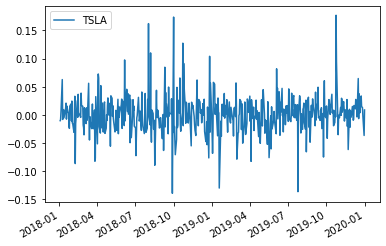

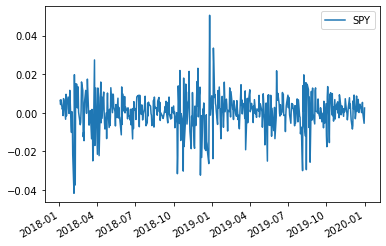

In [142]:
# Get data for the specified period and stocks
startDateStr = '2018/01/01'
endDateStr = '2020/01/01'
cachedFolderName = '../data/'
dataSetId = 'Data'
instrumentIds = ['TSLA']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
asset = ds.getBookDataByFeature()['adjClose']
instrumentIds = ['SPY']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
benchmark = ds.getBookDataByFeature()['adjClose']

# We have to take the percent changes to get to returns
# Get rid of the first (0th) element because it is NAN
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

# Let's plot them just for fun
r_a.plot()
r_b.plot();

Now we have to fit a line to the data to determine the slope. We use Ordinary Least Squares (OLS) for this.

In [126]:
# Let's define everything in familiar regression terms
X = r_b.values # Get just the values, ignore the timestamps
Y = r_a.values

# We add a constant so that we can also fit an intercept (alpha) to the model
# This just adds a column of 1s to our data
X = sm.add_constant(X)
model = regression.linear_model.OLS(Y, X)
model = model.fit()
# Remove the constant now that we're done
X = X[:, 1]
alpha = model.params[0]
beta = model.params[1]
print ('alpha: ' + str(alpha))
print ('beta: ' + str(beta))

alpha: 0.0004624828669990425
beta: 1.3435024875755412


We can plot the line of best fit to visualize this.

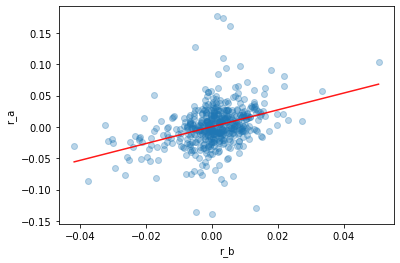

In [127]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.scatter(X, Y, alpha=0.3) # Plot the raw data
plt.xlabel("r_b")
plt.ylabel("r_a")

# Add the regression line, colored in red
plt.plot(X2, Y_hat, 'r', alpha=0.9);

### How to compute the volatility for a given asset

The volatility $\sigma$ of an asset is the standard deviation of its returns. A low volatility means that the returns are generally close to the mean, while a high volatility corresponds to returns that are often much higher and often much lower than expected.

We'll go ahead and continue using the stock from before:

In [130]:
# Use numpy to find the standard deviation of the returns
SD = np.std(Y)
print (SD)

# Let's compute the volatility for our benchmark, as well
benchSD = np.std(X)
print (benchSD)

0.03404241156172159
0.009418714869361309


This gives the daily volatility. As expected, the benchmark has a much lower volatility than the stock - a volatile asset would not make a good benchmark.

We generally compute the annualized volatility so that we can compare volatilities for daily, weekly, or monthly samples. To get it we normalize the standard deviation of the daily returns by multiplying by the square root of the number of trading days in a year:

$$\sigma_{\text{annual}} = SD \cdot \sqrt{252}$$

In [132]:
vol = SD*(252**.5)
print (vol)

benchvol = benchSD*(252**.5)
print (benchvol)

0.5404065301273516
0.14951746328493742


This tells us that we should expect the returns of a benchmark to cluster more closely around their mean than those of the stock. We can plot histograms of the returns to see this:

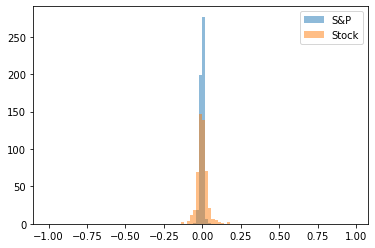

In [135]:
# Since we have many distinct values, we'll lump them into buckets of size .02
x_min = int(math.floor(X.min()))
x_max = int(math.ceil(X.max()))
plt.hist(X, bins=[0.02*i for i in range(x_min*50, x_max*50)], alpha=0.5, label='S&P')
plt.hist(Y, bins=[0.02*i for i in range(x_min*50, x_max*50)], alpha=0.5, label='Stock')
plt.legend(loc='upper right');

### How to compute the Sharpe and information ratios for an asset

The Sharpe and information ratios are used to calculate how well the historic returns of an asset compensate for its risk, relative to some benchmark or risk-free asset. An asset with a higher ratio has either higher returns, lower risk, or both. As when computing volatility, the standard deviation of the returns is used to measure risk.

$$R = \frac{E[r_a - r_b]}{\sqrt{Var(r_a - r_b)}}$$

$r_a$ are the returns of the asset, and $r_b$ are the returns of the benchmark; generally, Treasury bills are used when computing the Sharpe ratio, while the S&P 500 index is commonly used for the information ratio. We subtract the returns of the benchmark from the returns of the asset becasue we would like to get higher returns through our investment than we would, say, simply buying Treasury bills.

In [138]:
# Get the returns for a treasury-tracking ETF to be used in the Sharpe ratio
# Note that BIL is only being used in place of risk free rate,
# and should not be used in such a fashion for strategy development

instrumentIds = ['BIL']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
riskfree = ds.getBookDataByFeature()['adjClose']

r_b_S = riskfree.pct_change()[1:]
X_S = r_b_S.values

# Compute the Sharpe ratio for the asset we've been working with
SR = np.mean(Y - X_S)/np.std(Y - X_S)

# Compute the information ratio for the asset we've been working with, using the S&P index
IR = np.mean(Y - X)/np.std(Y - X)

# Print results
print ('Sharpe ratio: ' + str(SR))
print ('Information ratio: ' + str(IR))

Processing data for stock: BIL
20% done...
40% done...
60% done...
80% done...
Sharpe ratio: 0.030291090239406283
Information ratio: 0.017747256849180597


### How to compute the Sortino ratio for an asset

The Sharpe and information ratios are useful, but they penalize stocks for going above the expected return as well as for going below it. The Sortino ratio is modified to take into account only returns that fall below the mean.

$$S = \frac{E[r_a - r_b]}{\sqrt{Semivar(r_a - r_b)}}$$

The semivariance is the variance below the mean, and so quantifies the downside risk of our asset. Here as in the Sharpe ratio returns on Treasury bills can be used for $r_b$. The more skewed the distribution of returns is, the more the Sortino ratio will differ from the Sharpe ratio.

In [140]:
# To compute the semideviation, we want to filter out values which fall above the mean
meandif = np.mean(Y - X_S)
lows = [e for e in Y - X_S if e <= meandif]

# Because there is no built-in semideviation, we'll compute it ourselves
def dist(x):
    return (x - meandif)**2
semidev = math.sqrt(sum(map(dist,lows))/len(lows))

Sortino = meandif/semidev
print ('Sortino ratio: ' + str(Sortino))

Sortino ratio: 0.03174814792333494


--- 
---

## B. Portfolio Overview <a id="7"></a>

### Portfolio Analysis with Pyfolio


In professional quant workflows, it is critical to demonstrate the efficacy of any portfolio through rigorous testing. This is fundamental to understanding the risk profile as well as the performance of the portfolio. As such, quants and developers often have to build in-house tools to measure these metrics. To this end, we have created a package called pyfolio. pyfolio is a Python library for performance and risk analysis of financial portfolios, available on github [here](https://github.com/quantopian/pyfolio). It allows us to easily generate tear sheets to analyze the risk and performance of trading algorithms as well as return streams in general. 
    

#### Issues with Backtesting

It is often tempting to run many backtests while building an algorithm. A common pitfall is to use the success of backtests as a feedback metric to fine-tune an algorithm's parameters or features while still in the construction phase. This leads to the overfitting of the strategy to whichever time periods the user ran the backtests on. Ultimately, this results in poor performance when deployed out of sample in live trading.

As such, running backtests and generating tearsheets should only occur at the tail end of the algorithm creation lifecycle. We then get a picture of the algorithm's performance, aiding the user in deciding whether to move forward with the deployment of the algorithm or to switch to another strategy.

There are two main parts to a full pyfolio tearsheet. First, there are the performance statistics in table format. Useful metrics such as the annual return, market beta, and Sharpe ratio are all listed in this table. These metrics not only represent how well the strategy has performed during the time period of the backtest (annual rate of return), they also show the risk-adjusted return as measured by the different ratios. We will go into more detail about the meaning of these metrics. 

Next, there are plots which help to visualize a variety of the performance metrics. For instance, the user can use the drawdown plots to quickly pinpoint the time periods in which the strategy performed the worst. In addition, it will help the user to see if the strategy is performing as it should - if a strategy is market neutral, but suffers significant drawdowns during crisis periods, then there are clearly issues with the strategy's design or implementation.

### Setup - Getting a Backtest into the Research Environment

First, we import a backtest into the research envrionment. In this lecture, we will use the backtest from [this forum post](https://www.quantopian.com/posts/how-to-get-an-allocation-writing-an-algorithm-for-the-quantopian-investment-management-team).

In [88]:
import pyfolio as pf
import empyrical

,MyPortfolio,YourPortfolio
2017-01-02,102.053214,100.048323
2017-01-03,101.318095,99.590393
2017-01-04,100.693312,99.851232
2017-01-05,99.391960,99.750658
2017-01-06,100.497067,99.807467


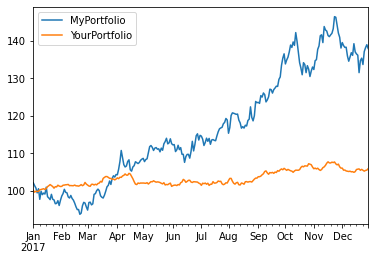

In [89]:
#Random Data
names = ['MyPortfolio','YourPortfolio']
dates = pd.date_range(start='2017-01-01',end='2017-12-31', freq=pd.tseries.offsets.BDay())
n = len(dates)
rdf = pd.DataFrame(
    np.zeros((n, len(names))),
    index = dates,
    columns = names
)

np.random.seed(1)
rdf['MyPortfolio'] = np.random.normal(loc = 0.1/n,scale=0.2/np.sqrt(n),size=n)
rdf['YourPortfolio'] = np.random.normal(loc = 0.04/n,scale=0.05/np.sqrt(n),size=n)

pdf = 100*np.cumprod(1+rdf)
pdf.plot()
pdf.head()

Now, we want to understand the returns, positions and transactions of the trading algorithm over our backtest's time period. We can get these data points from `backtest` object attributes.

In [119]:
import bt

In [103]:
bt_returns = rdf['MyPortfolio']
benchmark_rets = rdf['YourPortfolio']

Now, we are ready to use pyfolio to dive into the different performance metrics and plots of our algorithm. Throughout the course of this lecture we will detail how to interpret the various individual plots generated by an pyfolio tear sheet and include the proper call to generate the whole tear sheet at once at the end. This function is built into our backtest object, removing the need to write out all the code in the long form presented here.

### Performance Statistics

With pyfolio, there is a wealth of performance statistics which most professional fund managers would use to analyze the performance of the algorithm. These metrics range from the algorithm's annual and monthly returns, return quantiles, rolling beta and sharpe ratios to the turnover of the portfolio. The most critical metrics are discussed as follows.

#### Risk-Adjusted Return

The risk-adjusted return is an essential metric of any strategy. Risk-adjusted returns allow us to judge returns streams that have different individual volatilities by providing an avenue for meaningful comparison. There are different measures of risk-adjusted returns but one of the most popular is the Sharpe ratio. In this particular backtest, the annual return of $2\%$ for $1\%$ volatility is an example of a relatively low absolute return, but a relatively high risk-adjusted return. Then, with a low risk strategy, leverage can then be applied to increase the absolute return.

In [99]:
print ("The Sharpe Ratio of the backtest is: ", empyrical.sharpe_ratio(bt_returns))

The Sharpe Ratio of the backtest is:  1.727096387237381


#### Market Beta

The market beta of an algorithm is the exposure of that stategy to the broader market. For instance, a market beta of $1$ would mean that you're buying the the market, while a beta of $-1$ means that you are shorting the market. Any beta within this range signifies reduced market influence, while any beta outside this range signifies increased market influence. 

In [107]:
print ("The market beta of the backtest is: ", empyrical.beta(bt_returns,benchmark_rets))

The market beta of the backtest is:  -0.34280839725608003


In the case of this strategy, the beta is 0. This means that this strategy has no exposure to the broader market, it is *market neutral*. To institutional investors, market neutral strategies are very attractive. After all, if the investors want a strategy which is highly exposed to the market, they could simply buy an ETF or an index fund.

#### Drawdowns

A drawdown is the 'peak to trough decline' of an investment strategy. Intuitively speaking, it refers to the losses the strategy has experienced from the base amount of capital which it had at the peak. For instance, in the 2008 Financial Crisis, the market drawdown was over 50% from the peak in 2007 to the trough in 2009.

In [108]:
print ("The maxmimum drawdown of the backtest is: ", empyrical.max_drawdown(bt_returns))

The maxmimum drawdown of the backtest is:  -0.10219029491593909


This is another measure of the financial risk of an algorithm. If the net drawdown of a strategy is very significant, this generally means that the volatility of the algorithm is more significant. Good strategies try to limit drawdowns. A good benchmark is to have a maximum drawdown of less than 20%.

### Plotting

In pyfolio, there is a `plotting` module which allows users to quickly plot these metrics. These plots can be individually plotted using the following functions:

- `plot_annual_returns`
- `plot_daily_returns_similarity`
- `plot_daily_volume`
- `plot_drawdown_periods`
- `plot_drawdown_underwater`
- `plot_exposures`
- `plot_gross_leverage`
- `plot_holdings`
- `plot_long_short_holdings`
- `plot_monthly_returns_dist`
- `plot_monthly_returns_heatmap`
- `plot_multistrike_cones`
- `plot_prob_profit_trade`
- `plot_return_quantiles`
- `plot_rolling_beta`
- `plot_rolling_returns`
- `plot_rolling_sharpe`
- `plot_turnover`
- `plot_txn_time_hist`
- `show_and_plot_top_positions`

#### Returns Plots

Plots of cumulative returns and daily, non-cumulative returns allow you to gain a quick overview of the algorithm's performance and pick out any anomalies across the time period of the backtest. The cumulative return plot also allows you to make a comparison against benchmark returns - this could be against another investment strategy or an index like the S&P 500.

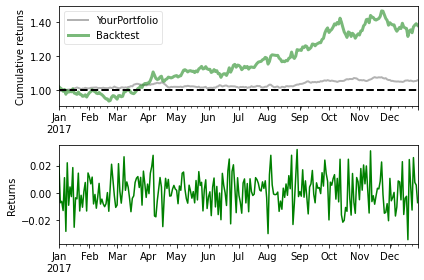

In [109]:
# Cumulative Returns
plt.subplot(2,1,1)
pf.plotting.plot_rolling_returns(bt_returns, benchmark_rets)

# Daily, Non-Cumulative Returns
plt.subplot(2,1,2)
pf.plotting.plot_returns(bt_returns)
plt.tight_layout()

With the annual and monthly return plots, you can see which years and months the algorithm performed the best in. For instance, in the monthly heatmap plot, this algorithm performed the best in June 2014 (shaded in dark green). In a backtest with a longer period of time, these plots will reveal more information. Furthermore, the distribution of the monthly returns is also instructive in gauging how the algorithm performs in different periods throughout the year and if it is affected by seasonal patterns.

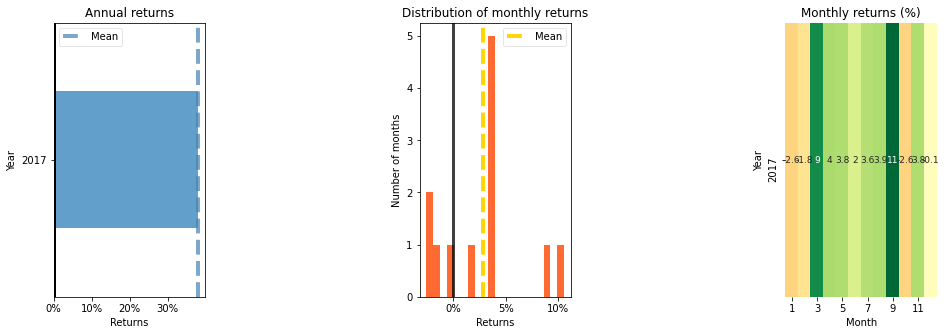

In [110]:
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(15,5)

#### Return Quantiles

These box and whisker plots provide an overview of the return quantiles broken down by the return timeframe (daily / weekly / monthly) across the entire backtest time period.

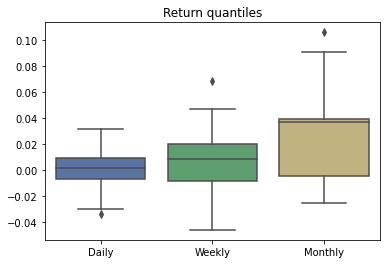

In [111]:
pf.plot_return_quantiles(bt_returns);

The center line in the middle of each box shows the median return, and the box shows the first quartile (25th percentile) as well as the 3rd quartile (75th percentile). While a high median return is always helpful, it is also important to understand the returns distribution. A tight box means that the bulk of the returns (25th - 75th percentile) fall within a tight bound - i.e. the returns are consistent and not volatile. A larger box means that the returns are more spread out. It is important, however, to take note of the scale to the left to put the quartiles in perspective. In addition, returns over longer periods of time will have a wider distribution as increasing the length of time increases the variability in returns. 

The 'whiskers' at the end indicate the returns which fall outside the 25th and 75th percentile. A tight box with long whiskers indicate that there may be outliers in the returns - which may not be ideal if the outliers are negative. This may indicate that your strategy may be susceptible to certain market conditions / time periods. 

#### Rolling Plots

Below, we have several rolling plots which show how an estimate changes throughout backtest period. In the case of the rolling beta and the rolling Sharpe ratio, the rolling estimate gives us more information than single point estimate for the entire period. A rolling estimate allows the user to see if the risk-adjusted return of the algorithm (Sharpe ratio) is consistent over time or if it fluctuates significantly. A volatile Sharpe ratio may indicate that the strategy may be riskier at certain time points or that it does not perform as well at these time points. Likewise, a volatile rolling beta indicates that it is exposed to the market during certain time points - if the strategy is meant to be market neutral, this could be a red flag.

#### Rolling Beta Plot

The plot below shows the rolling beta of the strategy against benchmark returns over the entire period of the backtest. In this instance, the benchmark return of the SPY was used. Thus, the lower the rolling portfolio beta to the SPY, the more market neutral an algorithm is.

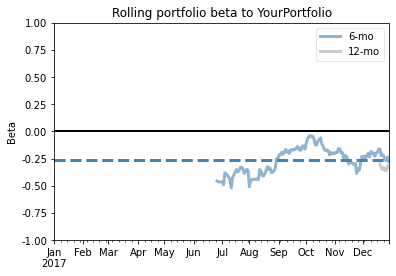

In [112]:
pf.plot_rolling_beta(bt_returns, benchmark_rets);

#### Rolling Sharpe Ratio Plot

The plot below shows the rolling Sharpe ratio over the period of the backtest. This allows you to understand the performance of the algorithm at different time points.

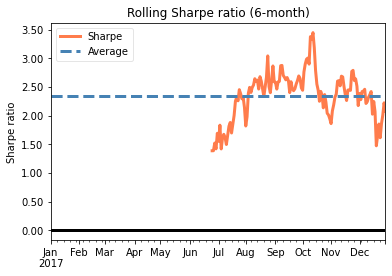

In [113]:
pf.plot_rolling_sharpe(bt_returns);

In the case of this strategy, the Sharpe ratio is above 2 for the first 4 months before dropping toward the end of the year. It would be helpful here to check if this algorithm is exposed to other risk factors. This may help to explain the end of year slump. In addition, it would be helpful to understand the market situation at that point in time to see if the strategy was in some way affected by market events.

#### Drawdown Plots

In this plot, we visualize the drawdown chart described above. This chart provides an overview of the worst drawdown periods in the backtest. These periods show the time windows in the backtest in which the top 5 drawdowns occurred. 

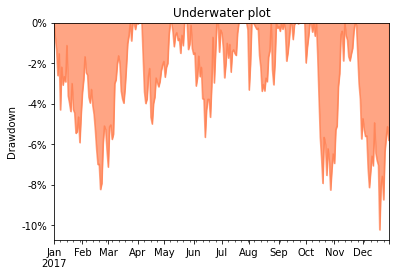

In [117]:
pf.plot_drawdown_underwater(bt_returns);

#### Creating a Full Tear Sheet

To put these all together, we use a single function call to `bt.create_full_tear_sheet`.

```j
pf.create_returns_tear_sheet(rdf['MyPortfolio'])
```

---

## C. Beta Hedging <a id="8"></a>



### Factor Models

Factor models are a way of explaining the returns of one asset via a linear combination of the returns of other assets. The general form of a factor model is

$$Y = \alpha + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n$$

This looks familiar, as it is exactly the model type that a linear regression fits. The $X$'s can also be indicators rather than assets. An example might be a analyst estimation.

### What is Beta?

An asset's beta to another asset is just the $\beta$ from the above model. For instance, if we regressed TSLA against the S&P 500 using the model $Y_{TSLA} = \alpha + \beta X$, then TSLA's beta exposure to the S&P 500 would be that beta. If we used the model $Y_{TSLA} = \alpha + \beta X_{SPY} + \beta X_{AAPL}$, then we now have two betas, one is TSLA's exposure to the S&P 500 and one is TSLA's exposure to AAPL.

Often "beta" will refer to a stock's beta exposure to the S&P 500. We will use it to mean that unless otherwise specified.

### Risk Exposure

More generally, this beta gets at the concept of how much risk exposure you take on by holding an asset. If an asset has a high beta exposure to the S&P 500, then while it will do very well while the market is rising, it will do very poorly when the market falls. A high beta corresponds to high speculative risk. You are taking out a more volatile bet.

At Quantopian, we value stratgies that have negligible beta exposure to as many factors as possible. What this means is that all of the returns in a strategy lie in the $\alpha$ portion of the model, and are independent of other factors. This is highly desirable, as it means that the strategy is agnostic to market conditions. It will make money equally well in a crash as it will during a bull market. These strategies are the most attractive to individuals with huge cash pools such as endowments and soverign wealth funds.

### Risk Management

The process of reducing exposure to other factors is known as risk management. Hedging is one of the best ways to perform risk management in practice.

#### Hedging

If we determine that our portfolio's returns are dependent on the market via this relation

$$Y_{portfolio} = \alpha + \beta X_{SPY}$$

then we can take out a short position in SPY to try to cancel out this risk. The amount we take out is $-\beta V$ where $V$ is the total value of our portfolio. This works because if our returns are approximated by $\alpha + \beta X_{SPY}$, then adding a short in SPY will make our new returns be $\alpha + \beta X_{SPY} - \beta X_{SPY} = \alpha$. Our returns are now purely alpha, which is independent of SPY and will suffer no risk exposure to the market.

#### Market Neutral

When a stragy exhibits a consistent beta of 0, we say that this strategy is market neutral.

#### Problems with Estimation

The problem here is that the beta we estimated is not necessarily going to stay the same as we walk forward in time. As such the amount of short we took out in the SPY may not perfectly hedge our portfolio, and in practice it is quite difficult to reduce beta by a significant amount.

We will talk more about problems with estimating parameters in future lectures. In short, each estimate has a stardard error that corresponds with how stable the estimate is within the observed data.

### The alpha/beta Tradeoff

Hedging against a benchmark such as the market will indeed reduce your returns while the market is not doing poorly. This is, however, completely fine. If your algorithm is less volatile, you will be able to take out leverage on your strategy and multiply your returns back up to their original amount. Even better, your returns will be far more stable than the original volatile beta exposed strategy.

By and large, even though high-beta strategies tend to be deceptively attractive due to their extremely good returns during periods of market growth, they fail in the long term as they will suffer extreme losses during a downturn.

### Other types of hedging

Although we will not execute them here, there are strategies for hedging that may be better suited for other investment approaches.

#### Pairs Trading

One is pairs trading, in which a second asset is used in place of the benchmark here. This would allow you, for instance, to cancel out the volatility in an industry by being long in the stock of one company and short in the stock of another company in the same industry.

#### Long Short Equity

In this case we define a ranking over a group of $n$ equities, then long the top $p\%$ and short the bottom $p\%$ in equal dollar volume. This has the advantage of being implicitly, versus explicitly, hedged when $n$ is large. To see why this is the case, imagine buying a set of 100 securities randomly. The chance that the market exposure beta of these 100 is far from 1.0 is very low, as we have taken a large sample of the market. Similarly, when we rank by some independent metric and buy the top 100, the chance that we select securities whose overall beta is far from 1.0 is low. So in selecting 100 long and 100 short, the strategy beta should be very close to 1 - 1 = 0. Obviously some ranking systems will introduce a sample bias and break this assumption, for example ranking by the estimated beta of the equity.

Another advantage of long short equity strategies is that you are making a bet on the ranking, or in other words the differential in performance between the top and bottom ranked equities. This means that you don't have to even worry about the alpha/beta tradeoff encountered in hedging.

###  Why You Should Hedge Beta and Sector Exposures

Whenever we have a trading strategy of any sort, we need to be considering the impact of systematic risk. There needs to be some risk involved in a strategy in order for there to be a return above the risk-free rate, but systematic risk poisons the well, so to speak. By its nature, systematic risk provides a commonality between the many securities in the market that cannot be diversified away. As such, we need to construct a hedge to get rid of it.

#### The Fundamental Law of Asset Management

The primary driver of the value of any strategy is whether or not it provides a compelling risk-adjusted return, i.e., the Sharpe Ratio. As expressed in The Foundation of Algo Success and "The Fundamental Law of Active Management", by Richard Grinold, Sharpe Ratio can be decomposed into two components, skill and breadth, as:

$$IR = IC \sqrt{BR}$$

Technically, this is the definition of the Information Ratio (IR), but for our purposes it is equivalent to the Sharpe Ratio. The IR is the ratio of the excess return of a portfolio over its benchmark per unit active risk, i.e., the excess return of a long-only portfolio less its benchmark per unit tracking error. In the time of Grinold’s publication, however, long/short investing was a rarity. Today, in the world of hedge funds and long/short investing, there is no benchmark. We seek absolute returns so, in this case, the IR is equivalent to the Sharpe ratio.

In this equation, skill is measured by IC (Information Coefficient), calculated with Alphalens. The IC is essentially the Spearman rank correlation, used to correlate your prediction and its realization. Breadth is measured as the number of **independent** bets in the period. The takeaway from this "law" is that, with any strategy, we need to:

1. Bet well (high IC),
2. Bet often (high number of bets), *and*
3. **Make independent bets**

If the bets are completely independent, then breadth is the total number of bets we have made for every individual asset, the number of assets times the number of periods. If the bets are not independent then the **effective breadth** can be much much less than the number of assets. Let's see precisely what beta exposure and sector exposure do to **effective breadth**.

##### TL;DR: 
Beta exposure and sector exposure lead to a significant increase in correlation among bets. Portfolios with beta and sector bets have very low effective breadth. In order to have high Sharpe then, these portfolios must have very high IC. It is easier to increase effective breadth by hedging beta and sector exposure than it is to increase your IC.


### Forecasts and Bet Correlation

We define a bet as the forecast of the *residual* of a security return. This forecast can be implicit -- i.e., we buy a stock and thus implicity we forecast that the stock will go up. What though do we mean by *residual*? Without any fancy math, this simply means the return **less a hedge**. Let's work through three examples. We use the Ledoit-Wolf covariance estimator to assess our covariance in all cases. For more information on why we use Ledoit-Wolf instead of typical sample covariance, check out Estimating Covariance Matrices.

#### Example 1: No Hedge!

If we go long on a set of securities, but do not hold any short positions, there is no hedge! So the *residual* is the stock return itself.

$$r_{resid,i} = r_i$$

Let's see what the correlation of our bets are in this case.

In [151]:
from sklearn.covariance import LedoitWolf

In [154]:
startDateStr = '2018/01/01'
endDateStr = '2020/01/01'
cachedFolderName = '../data/'
dataSetId = 'Data'
instrumentIds = ['WFC', 'JPM', 'USB', 'XOM', 'BHI', 'SLB']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
historical_prices = ds.getBookDataByFeature()['adjClose']
rets = historical_prices.pct_change().fillna(0)

lw_cov = LedoitWolf().fit(rets).covariance_ # Calculate Ledoit-Wolf estimator


def extract_corr_from_cov(cov_matrix):
    # Linear algebra result:
    # https://math.stackexchange.com/questions/186959/correlation-matrix-from-covariance-matrix
    d = np.linalg.inv(np.diag(np.sqrt(np.diag(cov_matrix))))
    corr = d.dot(cov_matrix).dot(d)
    return corr

Processing data for stock: WFC
Processing data for stock: JPM
Processing data for stock: USB
Processing data for stock: XOM
Processing data for stock: BHI
Processing data for stock: SLB
20% done...
40% done...
60% done...
80% done...


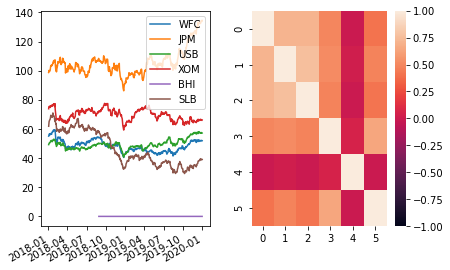

In [158]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.tight_layout()

corr = extract_corr_from_cov(lw_cov)
# Plot prices
left = historical_prices.plot(ax=ax1)
# Plot covariance as a heat map
right = sns.heatmap(corr, ax=ax2, fmt='d', vmin=-1, vmax=1)

In [159]:
average_corr = np.mean(corr[np.triu_indices_from(corr, k=1)])
print ('Average pairwise correlation: %.4f' % average_corr)

Average pairwise correlation: 0.3809


The result here is that we have six bets and they are all very highly correlated.

#### Example 2: Beta Hedge

In this case, we will assume that each bet is hedged against the market (SPY). In this case, the residual is calculated as:

$$ r_{resid,i} = r_i - \beta_i r_i $$

where $\beta_i$ is the beta to the market of security $i$ calculated with the CAPM and $r_i$ is the return of security $i$.

In [161]:
startDateStr = '2018/01/01'
endDateStr = '2020/01/01'
cachedFolderName = '../data/'
dataSetId = 'Data'
instrumentIds = ['WFC', 'JPM', 'USB', 'SPY', 'XOM', 'BHI', 'SLB' ]
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
historical_prices = ds.getBookDataByFeature()['adjClose']
rets = historical_prices.pct_change().fillna(0)


market = rets[['SPY']]
stock_rets = rets.drop(['SPY'], axis=1)
residuals = stock_rets.copy()*0

for stock in stock_rets.columns:
    model = sm.OLS(stock_rets[stock], market.values)
    results = model.fit()
    residuals[stock] = results.resid

lw_cov = LedoitWolf().fit(residuals).covariance_ # Calculate Ledoit-Wolf Estimator

Processing data for stock: WFC
Processing data for stock: JPM
Processing data for stock: USB
Processing data for stock: SPY
Processing data for stock: XOM
Processing data for stock: BHI
Processing data for stock: SLB
20% done...
40% done...
60% done...
80% done...


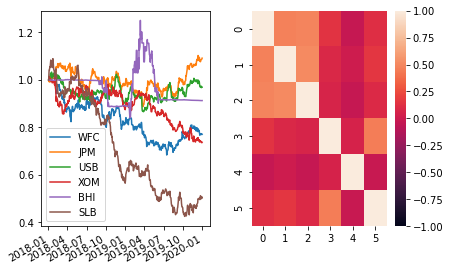

In [163]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.tight_layout()

corr = extract_corr_from_cov(lw_cov)
left = (1+residuals).cumprod().plot(ax=ax1)
right = sns.heatmap(corr, ax=ax2, fmt='d', vmin=-1, vmax=1)

In [164]:
average_corr = np.mean(corr[np.triu_indices_from(corr, k=1)])
print ('Average pairwise correlation: %.4f' % average_corr)

Average pairwise correlation: 0.1742


The beta hedge has brought down the average correlation significanty. Theoretically, this should improve our breadth. It is obvious that we are left with two highly correlated clusters however. Let's see what happens when we hedge the sector risk.

#### Example 3: Sector Hedge

The sector return and the market return are themselves highly correlated. As such, you cannot do a multivariate regression due to multicollinearity, a classic violation of regression assumptions. To hedge against both the market and a given security's sector, you first estimate the market beta residuals and then calculate the sector beta on *those* residuals.

$$
r_{resid,i} = r_i - \beta_i r_i \\
r_{resid_{SECTOR},i}= r_{resid,i} - \beta_{SECTOR,i}r_{resid,i}
$$

Here, $r_{resid, i}$ is the residual between the security return and a market beta hedge and $r_{resid_{SECTOR}, i}$ is the residual between *that* residual and a hedge of that residual against the relevant sector.

In [165]:
startDateStr = '2018/01/01'
endDateStr = '2020/01/01'
cachedFolderName = '../data/'
dataSetId = 'Data'
instrumentIds = ['WFC', 'JPM', 'USB', 'XLF', 'SPY', 'XOM', 'BHI', 'SLB', 'XLE']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
historical_prices = ds.getBookDataByFeature()['adjClose']
rets = historical_prices.pct_change().fillna(0)


market = rets[['SPY']]
stock_rets = rets.drop(['SPY'], axis=1)
residuals = stock_rets.copy()*0


# Get market hedge ticker
mkt = rets[['SPY']]
# Get sector hedge tickers
sector_1_hedge = rets[['XLF']]
sector_2_hedge = rets[['XLE']]
# Identify securities for each sector
sector_1_stocks = rets[['WFC', 'JPM', 'USB']]
sector_2_stocks = rets[['XOM', 'BHI', 'SLB']]

market_rets = mkt
sector_1_rets = sector_1_hedge
sector_2_rets = sector_2_hedge
                           
stock_rets = rets.drop(['XLF', 'SPY', 'XLE'], axis=1)
residuals_market = stock_rets.copy()*0
residuals = stock_rets.copy()*0
# Calculate market beta of sector 1 benchmark
model = sm.OLS(sector_1_rets.values, market.values)
results = model.fit()
sector_1_excess = results.resid
# Calculate market beta of sector 2 benchmark
model = sm.OLS(sector_2_rets.values, market.values)
results = model.fit()
sector_2_excess = results.resid

for stock in sector_1_stocks:
    # Calculate market betas for sector 1 stocks
    model = sm.OLS(stock_rets[stock], market.values)
    results = model.fit()
    # Calculate residual of security + market hedge
    residuals_market[stock] = results.resid
    # Calculate sector beta for previous residuals
    model = sm.OLS(residuals_market[stock], sector_1_excess)
    results = model.fit()
    # Get final residual
    residuals[stock] = results.resid
                           
for stock in sector_2_stocks:
    # Calculate market betas for sector 2 stocks
    model = sm.OLS(stock_rets[stock], market.values)
    results = model.fit()
    # Calculate residual of security + market hedge
    residuals_market[stock] = results.resid
    # Calculate sector beta for previous residuals
    model = sm.OLS(residuals_market[stock], sector_2_excess)
    results = model.fit()
    # Get final residual
    residuals[stock] = results.resid

# Get covariance of residuals
lw_cov = LedoitWolf().fit(residuals).covariance_

Processing data for stock: WFC
Processing data for stock: JPM
Processing data for stock: USB
Processing data for stock: XLF
Processing data for stock: SPY
Processing data for stock: XOM
Processing data for stock: BHI
Processing data for stock: SLB
Processing data for stock: XLE
20% done...
40% done...
60% done...
80% done...


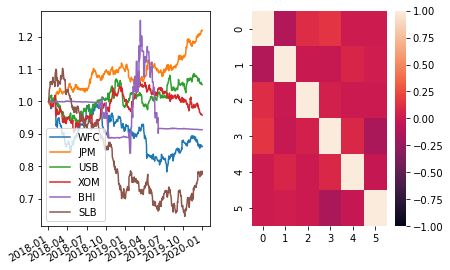

In [166]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.tight_layout()

corr = extract_corr_from_cov(lw_cov)
left = (1+residuals).cumprod().plot(ax=ax1)
right = sns.heatmap(corr, ax=ax2, fmt='d', vmin=-1, vmax=1)

In [167]:
average_corr = np.mean(corr[np.triu_indices_from(corr, k=1)])
print ('Average pairwise correlation: %.4f' % average_corr)

Average pairwise correlation: 0.0106


There we go! The sector hedge brought down the correlation between our bets to close to zero. 

### Calculating Effective Breadth

This section is based on "How to calculate breadth: An evolution of the fundamental law of active portfolio management", by David Buckle; Vol. 4, 6, 393-405, 2003, _Journal of Asset Management_. Buckle derives the "semi-generalised fundamental law of active management" under several weak assumptions. The key result of this paper (for us) is a closed-form calculaiton of effective breadth as a function of the correlation between bets. Buckle shows that breadth, $BR$, can be modeled as

$$BR = \frac{N}{1 + \rho(N -1)}$$

where N is the number of stocks in the portfolio and $\rho$ is the assumed single correlation of the expected variation around the forecast.

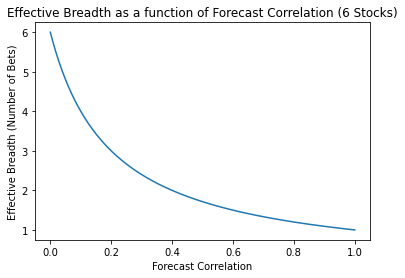

In [168]:
def buckle_BR_const(N, rho):
    return N/(1 + rho*(N - 1))

corr = np.linspace(start=0, stop=1.0, num=500)
plt.plot(corr, buckle_BR_const(6, corr))
plt.title('Effective Breadth as a function of Forecast Correlation (6 Stocks)')
plt.ylabel('Effective Breadth (Number of Bets)')
plt.xlabel('Forecast Correlation');

Here we see that in the case of the long-only portfolio, where the average correlation is 0.56, we are *effectively making only approximately 2 bets*. When we hedge beta, with a resulting average correlation of 0.22, things get a little better, *three effective bets*. When we add the sector hedge, we get close to zero correlation, and in this case the number of bets equals the number of assets, 6.

**More independent bets with the same IC leads to higher Sharpe ratio.**

#### Using this in Practice

Trading costs money due to market impact and commissions. As such, the post hoc implementation of a hedge is almost always suboptimal. In that case, you are trading purely to hedge risk. It is preferable to think about your sector and market exposure *throughout the model development process*. Sector and market risk is naturally hedged in a pairs-style strategy; in a cross-sectional strategy, consider de-meaning the alpha vector by the sector average; with an event-driven strategy, consider adding additional alphas so you can find offsetting bets in the same sector. As a last resort, hedge with a well chosen sector ETF.


#### Why You Should Hedge Beta and Sector Exposures (Part II)



In the first lecture on Why You Should Hedge Beta and Sector Exposure, we covered the information coefficient (IC) and effective breadth, providing yet more reasons to make as many independent bets as possible. Here we expand upon the concepts detailed there by decomposing portfolios of varying numbers of securities to further explore the effects of systematic risk.

#### Hedging Beta and Sector Risk is Good for Allocators (Which is Good for You!)

Let's work from two basic beliefs:
- You would like someone to fund your algorithm
- The institution that funds your algorithm is not going to allocate 100% of its money to you. In other words, your algorithm is one in a portfolio of algorithms.

The implication of the second belief is subtle. Why should it matter that your high Sharpe algo is part of a portfolio? The key to understanding the importance of this and what it has to do with beta and sector exposure is the following mathematical result:

**In a portfolio, stock specific risk can be diversified out while common factor risk cannot.**

#### TL;DR: 
Beta and sector exposure are **common factors**, i.e., they are among a handful of risk characteristics that are shared among all stocks. Risk exposure to common factors does not diversify away in a portfolio of algos. An allocator will not be able to make a large allocation to you if your algo presents common factor risk. The combination of many algos with modest common factor risk can lead to overwhelming common factor risk at the portfolio level. Allocators do not like this. If you want to get a large capital allocation, you must have low beta and sector exposure consistently over time.




#### Foundations

#### Single Stock Risk Decomposition

To build intuition, let's posit a single factor model:

$$r_i = \alpha_i + \beta_i r_m + \epsilon_i$$

where $\alpha_i$ is the intercept, $\epsilon_i$ is the error, and $r_m$ is the market return. This is the Capital Asset Pricing Model (CAPM), which posits that the returns to a stock can be attributable to its beta-weighted exposure to the market and a return which is idiosyncratic to that stock. Two important assumptions here are that the $\epsilon_i$s are uncorrelated to the market and each other across stocks. See the Lecture on Beta Hedging for more background.

In this case, the "risk", as measured by the variance, for an individual stock is:

$$\sigma_i^2 = \beta_i^2 \sigma_m^2 + \sigma_{\epsilon_i}^2$$

A stocks variance is broken into the **common risk**, $\beta_i^2\sigma_m^2$, and **specific risk**, $\sigma_{\epsilon_i}$. **Common risk** is risk in the stock driven by market risk which is common among all stocks proportionate to the stock's beta. **Specific risk** is the risk that is unique to that individual stock.

Let's look at two examples and decompose the risk into the percent due to common factor risk.

In [169]:
def stock_risk(beta, market_vol, idio_vol):
    common_risk = (beta**2)*(market_vol**2)
    specific_risk = idio_vol**2
    total_risk = common_risk + specific_risk
    return total_risk, common_risk/total_risk

We take two separate stocks, each with different market beta exposures and idiosyncratic volatility.

In [170]:
# Betas
b1 = 1.2
b2 = 1.1
# Market volatility
market_vol = 0.15
# Idiosyncratic volatilities
idio_vol_1 = 0.10 
idio_vol_2 = 0.07

In [171]:
total_1, pct_common_1 = stock_risk(b1, market_vol, idio_vol_1)
total_2, pct_common_2 = stock_risk(b2, market_vol, idio_vol_2)

print ("Stock 1 risk (annualized standard deviation): %0.4f " % np.sqrt(total_1))
print ("Stock 1: percent of total risk due to common risk: %0.4f " % pct_common_1)

print ("\nStock 2 risk (annualized standard deviation): %0.4f " % np.sqrt(total_2))
print ("Stock 2: percent of total risk due to common risk: %0.4f " % pct_common_2)

Stock 1 risk (annualized standard deviation): 0.2059 
Stock 1: percent of total risk due to common risk: 0.7642 

Stock 2 risk (annualized standard deviation): 0.1792 
Stock 2: percent of total risk due to common risk: 0.8475 


This is just looking at the breakdown of the risk associated with each individual stock. We can combine these into a portfolio to see how their combined volatility is affected by common factor risk.

#### Two Stock Portfolio Risk Decomposition

Now let's imagine you have a two stock portfolio with percentage weights $w_1$ and $w_2$. The risk of the portfolio (derived below), $\Pi$, under the one-factor model is then:

$$\sigma_{\Pi}^2 = \overbrace{\sigma_m^2\left( w_1^2\beta_1^2 + w_2^2\beta_2^2 + 2w_1w_2\beta_1\beta_1 \right)}^{\text{common risk}} + \overbrace{w_1^2\epsilon_1^2 + w_2^2 \epsilon_2^2}^{\text{specifc risk}}$$

This is the simplest possible example of portfolio factor risk, one factor and two assets, yet we can already use it to gain intuition about portfolio risk and hedging.

In [172]:
# The weights for each security in our portfolio
w1 = 0.5
w2 = 0.5

In [173]:
def two_stocks_one_factor(w1, w2, b1, b2, market_vol, idio_vol_1, idio_vol_2):
    common_risk = (market_vol**2)*(w1*w1*b1*b1 + w2*w2*b2*b2 + 2*w1*w2*b1*b2)
    specific_risk =  w1*w1*idio_vol_1**2 + w2*w2*idio_vol_2**2
    total_risk = common_risk + specific_risk
    return total_risk, common_risk/total_risk

The risk for a two stock, equally-weighted, long-only portfolio:

In [174]:
total, pct_common = two_stocks_one_factor(w1, w2, b1, b2, market_vol, idio_vol_1, idio_vol_2)
print ("Portfolio risk (annualized standard deviation): %0.4f " % np.sqrt(total))
print ("Percent of total risk due to common risk: %0.4f" % pct_common)

Portfolio risk (annualized standard deviation): 0.1830 
Percent of total risk due to common risk: 0.8887


The astute reader will notice that the proportion of risk in the portfolio due to common factor risk is **larger for the portfolio** than for the weighted sum of the common risk proportion for the two components. To repeat the key point in this lecture: **In a portfolio, stock specific risk diversifies while common factor risk does not.**

The risk for a two stock, beta-hedged long-short portfolio:

In [175]:
w2 = -w1*b1/b2    # set weight 2 such that the portfolio has zero beta

total, pct_common = two_stocks_one_factor(w1, w2, b1, b2, market_vol, idio_vol_1, idio_vol_2)
print ("Portfolio risk (annualized standard deviation): %0.4f " % np.sqrt(total))
print ("Percent of total risk due to common risk: %0.4f" % pct_common)

Portfolio risk (annualized standard deviation): 0.0629 
Percent of total risk due to common risk: 0.0000


Note that we eliminated **all** the common risk with a perfect beta hedge.


#### Portfolio Risk

If $X$ is a column vector of n random variables, $X_1,\dots,X_n$, and $c$ is a column vector of coefficients (constants), then the [variance of the weighted sum](https://en.wikipedia.org/wiki/Variance) $c'X$ is

$$\text{Var}(c'X) = c'\Sigma c$$

where $\Sigma$ is the covariance matrix of the $X$'s.

In our application, $c$ is our stock weight vector $w$ and $\Sigma$ is the covariance matrix of stock returns.

$$\sigma_{\Pi}^2 = w' \Sigma w$$

Just as we decompose the single stock risk above, we can decompose the covariance matrix to separate *common risk* and *specific risk*

$$\Sigma = BFB' + D$$

Thus

$$\sigma_{\Pi}^2  = w'(BFB' + D)w$$
$$\sigma_{\Pi}^2  = w'BFB'w + w'Dw$$

Which for the two stock portfolio above works out to

\begin{equation}
\sigma_{\Pi}^2 =
\overbrace{
\begin{bmatrix} w_1 & w_2 \end{bmatrix}
\begin{bmatrix} \beta_{1} \\ \beta_{2} \end{bmatrix} 
\sigma_m^2
\begin{bmatrix} \beta_{1} & \beta_{2} \end{bmatrix}
\begin{bmatrix} w_1 \\ w_2 \end{bmatrix}
}^{\text{common risk}}
+ \overbrace{\begin{bmatrix} w_1 & w_2 \end{bmatrix}
\begin{bmatrix} \epsilon_1^2 & 0\\ 0 & \epsilon_2^2 \end{bmatrix}
\begin{bmatrix} w_1 \\ w_2 \end{bmatrix}}^{\text{specific risk}}
\end{equation}

If you work through this matrix multiplication, you get the stated result above

$$\sigma_{\Pi}^2 = \overbrace{\sigma_m^2\left( w_1^2\beta_1^2 + w_2^2\beta_2^2 + 2w_1w_2\beta_1\beta_1 \right)}^{\text{common risk}} + \overbrace{w_1^2\epsilon_1^2 + w_2^2 \epsilon_2^2}^{\text{specifc risk}}$$

#### Multi-Factor Models

Of course, we can expand the CAPM to include *additional* risk factors besides market beta. We could posit that there are in total $m$ risks which are *common* to all stocks.

$$r_i = \alpha_i + \beta_{1,i} f_1 + \dots + \beta_{m,i} f_m + \epsilon_i$$

or more concisely

$$r_i = \alpha_i + \sum_{j=1}^m \beta_{j,i} f_j + \epsilon_i$$

or, considering all stocks, $i$, from 1 to N, even more concisely, for a given period $t$,

$$r = \alpha + Bf + \epsilon$$

where $r$ is the Nx1 column vector of returns, $B$ is the Nx$m$ matrix of factor betas, $f$ is the mx1 column of factor returns, and $\epsilon$ is the Nx1 column vector of idiosyncratic returns. Finally,

$$\sigma_{\Pi}^2  = w'BFB'w + w'Dw$$

where $B$ is the Nx$m$ matrix of factor betas, $F$ is the $m$x$m$ covariance matrix of factor returns, and $D$ is a NxN matrix with the variance of $\epsilon_i$'s on diagonal, and zeros everywhere else.

With this result, *assuming we had a suitable risk model giving us the matrices $B$, $F$, and $D$*, we could calculate our portfolio risk and the proportion of risk coming from common risk.

Likewise, just as we set $w_2$ above in the two stock case to the value that neutralized the exposure to the single factor $\beta$, in the multi-factor case we could use the factor betas matrix $B$ to construct a portfolio which is neutral to **all** common factors. **A portfolio which is neutral to all common factors has zero common factor risk.**


#### Portfolios of Algos

Even without a risk model, we can get some intuition as to how the risk of a portfolio of algos looks.

What does a resulting portfolio of algos look like when the individual algos have non-zero common risk? Taking some inspiration from a recent journal article [The Dangers of Diversification](http://www.iijournals.com/doi/abs/10.3905/jpm.2017.43.2.013?journalCode=jpm) by Garvey, Kahn, and Savi, imagine that each algo has a certain *budget of common risk* it can take. This budget is defined as the percent common risk of total risk in the algo.

In the first case, we assume that all algos have this same budget (and use all the budget!) and the correlation between their common risks is 1.0. This is simular to the case of a single factor model.



In [176]:
def portfolio_risk_decomposition(budget=0.2, correl=1.0, algo_count=2, algo_total_risk=0.04):
    N = algo_count
    
    algo_common_risk = budget*(algo_total_risk**2)
    algo_idio_risk = algo_total_risk**2 - algo_common_risk

    w = 1./N
    
    covar = correl*algo_common_risk
    common_risk = N*w*w*algo_common_risk + (N*N - N)*w*w*covar
    idio_risk = algo_idio_risk*w
    total_risk = common_risk + idio_risk
    
    return total_risk, common_risk/total_risk

In [177]:
a, b = portfolio_risk_decomposition(budget=0.2, algo_count=20, correl=1.0, algo_total_risk=0.04)
print ("Portfolio total risk: %.4f " % np.sqrt(a))
print ("Portfolio percent of common risk: %.4f " % b)

Portfolio total risk: 0.0196 
Portfolio percent of common risk: 0.8333 


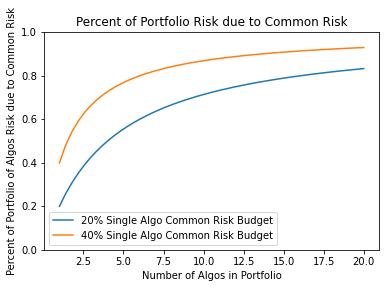

In [178]:
algos = np.linspace(1,20)
plt.plot(
    algos,
    portfolio_risk_decomposition(budget=0.2, correl=1.0, algo_count=algos)[1]
)
plt.plot(
    algos,
    portfolio_risk_decomposition(budget=0.4, correl=1.0, algo_count=algos)[1]
)
plt.ylim([0,1]);
plt.title('Percent of Portfolio Risk due to Common Risk')
plt.xlabel('Number of Algos in Portfolio')
plt.ylabel('Percent of Portfolio of Algos Risk due to Common Risk')
plt.legend(
    ['20% Single Algo Common Risk Budget', '40% Single Algo Common Risk Budget']
);

From this plot, you can see that from the allocator's perspective, a "small" budget that allows for 20% of individual algo total risk to be driven by common risk leads to a 20 algo portfolio **with 83%** of it's risk driven by common risk! Ideally an allocator wants you to have **zero common factor risk**.

#### TL;DR:
Even if you can't predict portfolio risk and don't have a risk model to decompose risk, you can form a portfolio with **zero common risk** by hedging the beta exposure to common factors. The most important common factors in the US Equity market are market beta and sector beta. Hedge your beta and be sector neutral if you want a large allocation from any allocator.


---
---

# 3. Portfolio Strategy <a id="9"></a>

## A. Markowitz <a id="10"></a>

### Introduction
In this blog post you will learn about the basic idea behind Markowitz portfolio optimization as well as how to do it in Python. We will then show how you can create a simple backtest that rebalances its portfolio in a Markowitz-optimal way. We hope you enjoy it and get a little more enlightened in the process. 


We will start by using random data and only later use actual stock data. This will hopefully help you to get a sense of how to use modelling and simulation to improve your understanding of the theoretical concepts. Don‘t forget that the skill of an algo-trader is to put mathematical models into code and this example is great practice.

Let's start with importing a few modules, which we need later and produce a series of normally distributed returns. `cvxopt` is a convex solver which you can easily download with
`sudo pip install cvxopt`.

### Simulations

In [44]:
import cvxopt as opt
from cvxopt import blas, solvers


np.random.seed(123)

# Turn off progress printing 
solvers.options['show_progress'] = False

In [45]:
# (*) To communicate with Plotly's server, sign in with credentials file
import plotly as py  

# (*) Useful Python/Plotly tools
import plotly.tools as tls   

# (*) Graph objects to piece together plots
from plotly.graph_objs import *

Assume that we have 4 assets, each with a return series of length 1000. We can use `numpy.random.randn` to sample returns from a normal distribution.

In [46]:
## NUMBER OF ASSETS
n_assets = 4

## NUMBER OF OBSERVATIONS
n_obs = 1000

return_vec = np.random.randn(n_assets, n_obs)

Text(0, 0.5, 'returns')

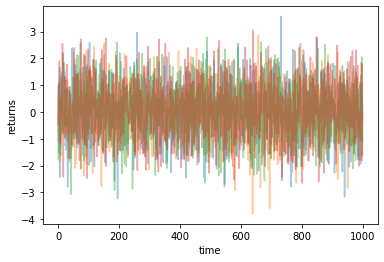

In [47]:
fig = plt.figure()
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns')

These return series can be used to create a wide range of portfolios, which all
have different returns and risks (standard deviation). We can produce a wide range
of random weight vectors and plot those portfolios. As we want all our capital to be invested, this vector will have to some to one.

In [48]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

print (rand_weights(n_assets))
print (rand_weights(n_assets))

[0.54066805 0.2360283  0.11660484 0.1066988 ]
[0.27638339 0.03006307 0.47850085 0.21505269]


Next, lets evaluate how many of these random portfolios would perform. Towards this goal we are calculating the mean returns as well as the volatility (here we are using standard deviation). You can also see that there is
a filter that only allows to plot portfolios with a standard deviation of < 2 for better illustration.

In [49]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

In the code you will notice the calculation of the return with:

$$ R = p^T w $$

where $R$ is the expected return, $p^T$ is the transpose of the vector for the mean
returns for each time series and w is the weight vector of the portfolio. $p$ is a Nx1
column vector, so $p^T$ turns into a 1xN row vector which can be multiplied with the
Nx1 weight (column) vector w to give a scalar result. This is equivalent to the dot
product used in the code. Keep in mind that `Python` has a reversed definition of
rows and columns and the accurate `NumPy` version of the previous equation would
be `R = w * p.T`

Next, we calculate the standard deviation with

$$\sigma = \sqrt{w^T C w}$$

where $C$ is the covariance matrix of the returns which is a NxN matrix. Please
note that if we simply calculated the simple standard deviation with the appropriate weighting using `std(array(ret_vec).T*w)` we would get a slightly different
’bullet’. This is because the simple standard deviation calculation would not take
covariances into account. In the covariance matrix, the values of the diagonal
represent the simple variances of each asset while the off-diagonals are the variances between the assets. By using ordinary `std()` we effectively only regard the
diagonal and miss the rest. A small but significant difference.

Lets generate the mean returns and volatility for 500 random portfolios:

In [50]:
import sys

In [51]:
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in range(n_portfolios)
])

Upon plotting those you will observe that they form a characteristic parabolic
shape called the ‘Markowitz bullet‘ with the boundaries being called the ‘efficient
frontier‘, where we have the lowest variance for a given expected.

Text(0.5, 1.0, 'Mean and standard deviation of returns of randomly generated portfolios')

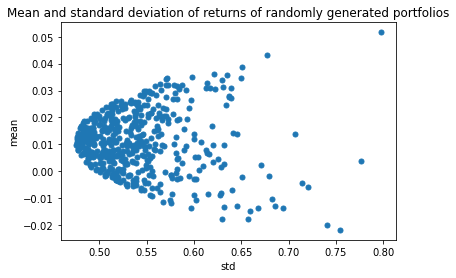

In [52]:
fig = plt.figure()
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')


### Markowitz optimization and the Efficient Frontier

Once we have a good representation of our portfolios as the blue dots show we can calculate the efficient frontier Markowitz-style. This is done by minimising

$$ w^T C w$$

for $w$ on the expected portfolio return $R^T w$ whilst keeping the sum of all the
weights equal to 1:

$$ \sum_{i}{w_i} = 1 $$
Here we parametrically run through $R^T w = \mu$ and find the minimum variance
for different $\mu$‘s. This can be done with `scipy.optimise.minimize` but we have
to define quite a complex problem with bounds, constraints and a Lagrange multiplier. Conveniently, the `cvxopt` package, a convex solver, does all of that for us. We used one of their [examples]() with some modifications as shown below. You will notice that there are some conditioning expressions in the code. They are simply needed to set up the problem. For more information please have a look at the `cvxopt` example.

The `mus` vector produces a series of expected return values $\mu$ in a non-linear and more appropriate way. We will see later that we don‘t need to calculate a lot of these as they perfectly fit a parabola, which can safely be extrapolated for higher values.

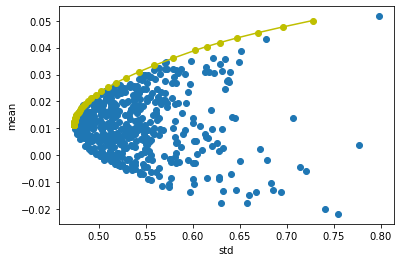

In [53]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(return_vec)

fig = plt.figure()
plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')

In yellow you can see the optimal portfolios for each of the desired returns (i.e. the `mus`). In addition, we get the one optimal portfolio returned:

In [54]:
print (weights)

[[2.77880107e-09]
 [3.20322848e-06]
 [1.54301198e-06]
 [9.99995251e-01]]


---
---


## B. Risk-Constrained Portfolio Optimization <a id="11"></a>


Risk management is critical for constructing portfolios and building algorithms. Its main function is to improve the quality and consistency of returns by adequately accounting for risk. Any returns obtained by *unexpected* risks, which are always lurking within our portfolio, can usually not be relied upon to produce profits over a long time. By limiting the impact of or eliminating these unexpected risks, the portfolio should ideally only have exposure to the alpha we are pursuing. In this lecture, we will focus on how to use factor model in risk management. 

### Factor Models
The notation we generally use when introducing a factor model is as follows:

$$R_i = a_i + b_{i1} F_1 + b_{i2} F_2 + \ldots + b_{iK} F_k + \epsilon_i$$

where:

$$\begin{eqnarray}
k &=& \text{the number of factors}\\
R_i &=& \text{the return for company $i$}, \\
a_i &=& \text{the intercept},\\
F_j &=& \text{the return for factor $j$, $j \in [1,k]$}, \\
b_{ij} &=& \text{the corresponding exposure to factor $j$, $j \in [1,k]$,} \\
\epsilon_i &=& \text{specific fluctuation of company $i$.}\\
\end{eqnarray}$$



To quantify unexpected risks and have acceptable risk levels in a given portfolio, we need to answer 3 questions:

1. What proportion of the variance of my portfolio comes from common risk factors?
      
2. How do I limit this risk?
   
3. Where does the return/PNL of my portfolio come from, i.e., to what do I attribute the performance?

These risk factors can be:
- Classical fundamental factors, such as those in the CAPM (market risk) or the Fama-French 3-Factor Model (price-to-book (P/B) ratio, volatility)
- Sector or industry exposure
- Macroeconomic factors, such as inflation or interest rates
- Statistical factors that are based on historical returns and derived from principal component
  analysis

### Factor Returns and Exposures

We will start with the classic Fama-French factors. The Fama-French factors are the market, company size, and company price-to-book (PB) ratio. We compute each asset's exposures to these factors, computing the factors themselves using pipeline code borrowed from the Fundamental Factor Models lecture. 

### Calculating the Exposures

Running a multiple linear regression on the fundamental factors for each asset in our universe, we can obtain the corresponding factor exposure for each asset. Here we express:

$$ R_i = \alpha_i + \beta_{i, MKT} R_{i, MKT} + \beta_{i, HML} R_{i, HML} + \beta_{i, SMB} R_{i, SMB} + \epsilon_i$$

for each asset $S_i$. This shows us how much of each individual security's return is made up of these risk factors.

We calculate the risk exposures on an asset-by-asset basis in order to get a more granular view of the risk of our portfolio. This approach requires that we know the holdings of the portfolio itself, on any given day, and is computationally expensive.

### Splitting Variance into Common Factor Risks

The portfolio variance can be represented as:
  
  $$\sigma^2 = \omega BVB^{\top}\omega^{\top} + \omega D\omega^{\top}$$

where:

$$\begin{eqnarray}
B &=& \text{the matrix of factor exposures of $n$ assets to the factors} \\
    V &=& \text{the covariance matrix of factors} \\
    D &=& \text{the specific variance} \\
    \omega &=& \text{the vector of portfolio weights for $n$ assets}\\
    \omega BVB^{\top}\omega^{\top} &=& \text{common factor variance} \\
    \omega D\omega^{\top} &=& \text{specific variance} \\
\end{eqnarray}$$

#### Computing Common Factor and Specific Variance:

Here we build functions to break out the risk in our portfolio. Suppose that our portfolio consists of all stocks in the Q3000US, equally-weighted. Let's have a look at how much of the variance of the returns in this universe are due to common factor risk.

In order to actually calculate the percentage of our portfolio variance that is made up of common factor risk, we do the following:


$$\frac{\text{common factor variance}}{\text{common factor variance + specific variance}}$$

So we see that if we just take every single security in the Q3000US and equally-weight them, we will end up possessing a portfolio that effectively only contains common risk.

### Risk-Constrained Optimization

Currently we are operating with an equal-weighted portfolio. However, we can reapportion those weights in such a way that we minimize the common factor risk illustrated by our common factor exposures. This is a portfolio optimization problem to find the optimal weights.

We define this problem as:

\begin{array}{ll} \mbox{$\text{minimize/maximum}$}_{w} & \text{objective function}\\
\mbox{subject to} & {\bf 1}^T \omega = 1, \quad f=B^T\omega\\
& \omega \in {\cal W}, \quad f \in {\cal F},
\end{array}

where the variable $w$ is the vector of allocations, the variable $f$ is weighted factor exposures, and  the variable ${\cal F}$ provides our constraints for $f$. We set ${\cal F}$ as a vector to bound the weighted factor exposures of the porfolio. These constraints allow us to reject weightings that do not fit our criteria. For example, we can set the maximum factor exposures that our portfolios can have by changing the value of ${\cal F}$. A value of $[1,1,1]$ would indicate that we want the maximum factor exposure of the portfolio to each factor to be less than $1$, rejecting any portfolios that do not meet that condition.

We define the objective function as whichever business goal we value highest. This can be something such as maximizing the Sharpe ratio or minimizing the volatility. Ultimately, what we want to solve for in this optimization problem is the weights, $\omega$.

Let's quickly generate some random weights to see how the weighted factor exposures of the portfolio change.

The variable $f$ contains the weighted factor exposures of our portfolio, with size equal to the number of factors we have.  As we change $\omega$, our weights, our weighted exposures, $f$, also change.

--- 
---

# APPENDIX <a id="12"></a>
<a id="11"></a>

## A: Outlook for Part II: Derivatives, Big Data and Sentiment Analysis   <a id="13"></a>

### Potential Topics for next Semester:
- Futures, Options and other Derivatives — How to model them accordingly for AlgoTrading
- Data Scraping — How to get your hands on unique Data and gain an Edge
- Sentiment Analysis: Using pre-trained Models to conduct a Sentiment analysis

--- 
---

## B. Sources for a Stream of Information and novel Strategies <a id="14"></a>

[Quant Library on GitHub](https://github.com/wilsonfreitas/awesome-quant)
<br>
[Risk and Portfolio Management Library](https://riskfolio-lib.readthedocs.io/en/latest/index.html)
<br>
[KPI Library/Stock Screener](http://www.stockfetcher.com)
<br>
[Machine Learning Financial Laboratory](https://mlfinlab.readthedocs.io/en/latest/index.html)
<br>
[Backtesting Library](https://pypi.org/project/Backtesting/)
<br>


--- 
---

# Thank you for completing this lecture!

<hr>
<p> <center>Lecture by Jonas Gottal — This notebook is released exclusively for the <a href="https://www.tuinvest.de/">TU Investment Club e.V.</a></center></p>
